#### Let's see if the differences of our estimates are statistically significant.

In [1]:
import glacierml as gl
import path_manager as pm
[
        home_path, data_path, RGI_path, glathida_path, 
        ref_path, coregistration_testing_path, 
        arch_test_path, LOO_path
] = pm.set_paths()
import pandas as pd
pd.set_option('display.max_column',None)
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
cols,df = gl.load_LOO_data(home_path,include_refs = True, include_train = True)

In [3]:
df = pd.concat([
    df, pd.Series(np.mean(df[cols],axis = 1), name = 'est')
], axis = 1)

-3.5340084592938013


100%|██████████████████████████████████| 20000/20000 [00:00<00:00, 46025.68it/s]

-5.398707999763908
5.315840047270391
p-value = 0.5626


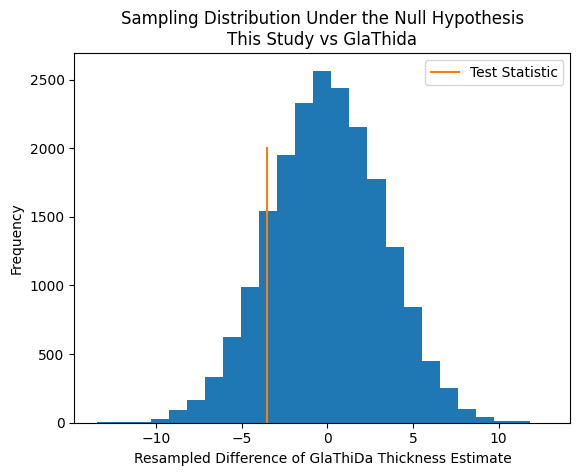

In [4]:
# X1 = df['est'] * df['Area']
# X2 = df['Thickness'] * df['Area']

X1 = df['est']*1e3
X2 = df['Thickness']*1e3

n_perm = 20000

# combine the data for shuffling
comb_data = np.concatenate([X1,X2])

# find the mean we are testing if it is statistically 
test_stat = np.mean(X1)-np.mean(X2)

perm_stat = np.zeros(n_perm)
print(test_stat)
for i in tqdm(range(n_perm)):
    np.random.shuffle(comb_data)
    perm_x1 = comb_data[:len(X1)]
    perm_x2 = comb_data[len(X2):]
    perm_stat[i] = np.mean(perm_x1) - np.mean(perm_x2)
lb = np.quantile(perm_stat, q = 0.05)
ub = np.quantile(perm_stat, q = 0.95)
p_value = 2*(np.abs(perm_stat) >= np.abs(test_stat)).mean()
print(lb)
print(ub)
print('p-value = ' + str(p_value))

plt.hist(perm_stat,bins = 25)


plt.plot(
    (test_stat,test_stat),
    (0,2000),label = 'Test Statistic'
)
plt.ylabel('Frequency')
plt.xlabel('Resampled Difference of GlaThiDa Thickness Estimate')
plt.title(
    'Sampling Distribution Under the Null Hypothesis\nThis Study vs GlaThida')
plt.legend()

-8.408671899592917


100%|██████████████████████████████████| 20000/20000 [00:00<00:00, 46794.98it/s]

-7.035159274160645
7.009150117657559
0.0975


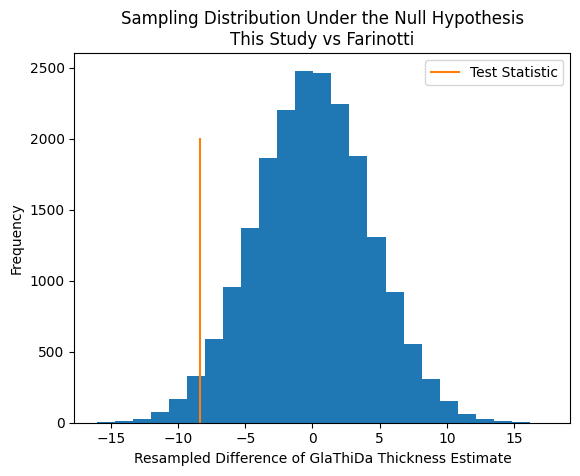

In [5]:
X1 = df['Thickness']*1e3
X2 = df['FMT']*1e3

n_perm = 20000

comb_data = np.concatenate([X1,X2])

test_stat = np.mean(X1)-np.mean(X2)

perm_stat = np.zeros(n_perm)
print(test_stat)
for i in tqdm(range(n_perm)):
    np.random.shuffle(comb_data)
    perm_x1 = comb_data[:len(X1)]
    perm_x2 = comb_data[len(X2):]
    perm_stat[i] = np.mean(perm_x1) - np.mean(perm_x2)

lb = np.quantile(perm_stat, q = 0.05)
ub = np.quantile(perm_stat, q = 0.95)
p_value = 2*(np.abs(perm_stat) >= np.abs(test_stat)).mean()
print(lb)
print(ub)
print(p_value)

plt.hist(perm_stat,bins = 25)


plt.plot(
    (test_stat,test_stat),
    (0,2000),label = 'Test Statistic'
)
plt.ylabel('Frequency')
plt.xlabel('Resampled Difference of GlaThiDa Thickness Estimate')
plt.title(
    'Sampling Distribution Under the Null Hypothesis\nThis Study vs Farinotti'
)
plt.legend()

In [6]:
cols, df = gl.load_LOO_data(home_path, include_refs = True, include_train = False)
df = pd.concat([
    df, pd.Series(np.mean(df[cols],axis = 1), name = 'est')
], axis = 1)

9.313488


100%|████████████████████████████████████| 20000/20000 [03:03<00:00, 108.71it/s]

0.0


Text(0.5, 1.0, 'Sampling Distribution Under the Null Hypothesis')

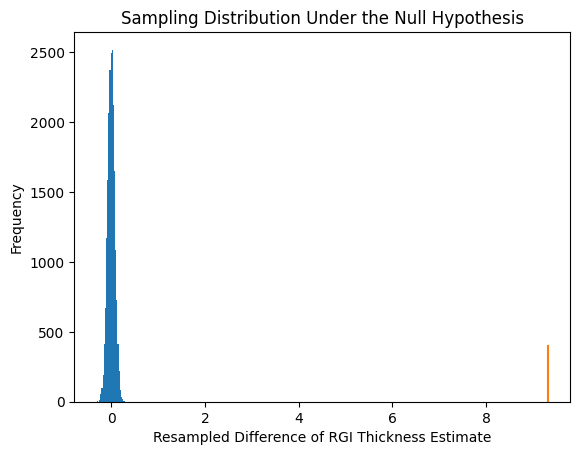

In [7]:
X1 = df['est']*1e3
X2 = df['FMT']*1e3

n_perm = 20000

comb_data = np.concatenate([X1,X2])

test_stat = np.mean(X1)-np.mean(X2)

perm_stat = np.zeros(n_perm)
print(test_stat)
for i in tqdm(range(n_perm)):
    np.random.shuffle(comb_data)
    perm_x1 = comb_data[:len(X1)]
    perm_x2 = comb_data[len(X2):]
    perm_stat[i] = np.mean(perm_x1) - np.mean(perm_x2)
    
p_value = 2*(np.abs(perm_stat) >= np.abs(test_stat)).mean()

print(p_value)

x = perm_stat
# logbins = np.logspace(np.log10(x.min()),np.log10(x.max()),25)
plt.hist(perm_stat,bins = 25)


plt.plot(
    (test_stat,test_stat),
    (0,400),label = 'Test Statistic'
)
plt.ylabel('Frequency')
plt.xlabel('Resampled Difference of RGI Thickness Estimate')
plt.title('Sampling Distribution Under the Null Hypothesis')
# plt.xscale('symlog')
# plt.legend()

-0.00016919628063492603


100%|████████████████████████████████████| 20000/20000 [01:50<00:00, 180.27it/s]

0.0076


Text(0.5, 1.0, 'Sampling Distribution Under the Null Hypothesis')

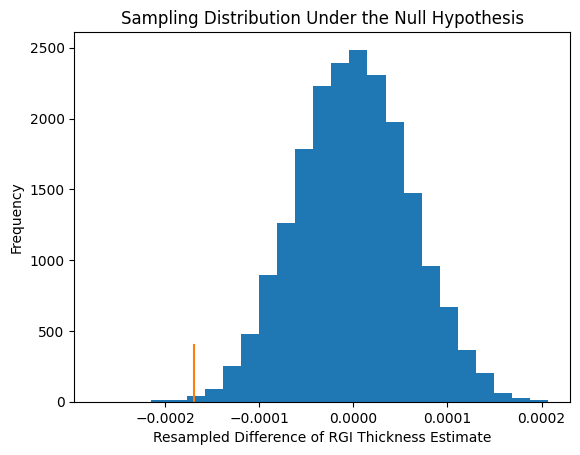

In [8]:
X1 = df['est']/1e3 * df['Area']
X2 = df['FMT']/1e3 * df['Area']

n_perm = 20000

comb_data = np.concatenate([X1,X2])

test_stat = np.mean(X1)-np.mean(X2)

perm_stat = np.zeros(n_perm)
print(test_stat)
for i in tqdm(range(n_perm)):
    np.random.shuffle(comb_data)
    perm_x1 = comb_data[:len(X1)]
    perm_x2 = comb_data[len(X2):]
    perm_stat[i] = np.mean(perm_x1) - np.mean(perm_x2)
    
p_value = 2*(np.abs(perm_stat) >= np.abs(test_stat)).mean()

print(p_value)

x = perm_stat
# logbins = np.logspace(np.log10(x.min()),np.log10(x.max()),25)
plt.hist(perm_stat,bins = 25)


plt.plot(
    (test_stat,test_stat),
    (0,400),label = 'Test Statistic'
)
plt.ylabel('Frequency')
plt.xlabel('Resampled Difference of RGI Thickness Estimate')
plt.title('Sampling Distribution Under the Null Hypothesis')
# plt.xscale('symlog')
# plt.legend()